<img src="logo_UTN.svg" align="right" width="150" /> 

## Teoría de Circuitos II

### Tarea Semanal 13

#### Por Matías Marfisi


# Ejercicio 1

## Desarrollo

![Consigna](Consigna1.png "Consigna")

![3](Desarrollo/3.jpeg "3")

![4](Desarrollo/4.jpeg "4")

## Simulacion

In [2]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (25,15)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

#fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
#plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig

import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import  Resistor, Capacitor, Inductor
import numpy as np
import ltspice

1.000015485625591
3
2 1/8
10 1/10
3


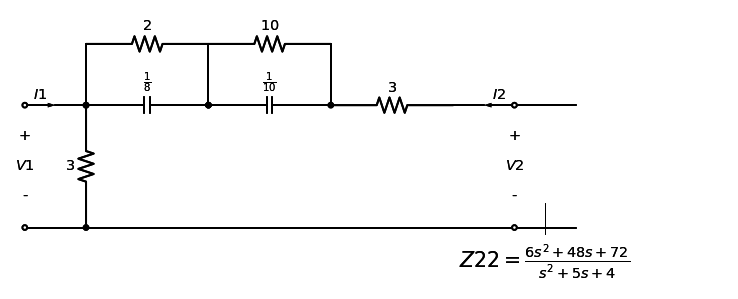

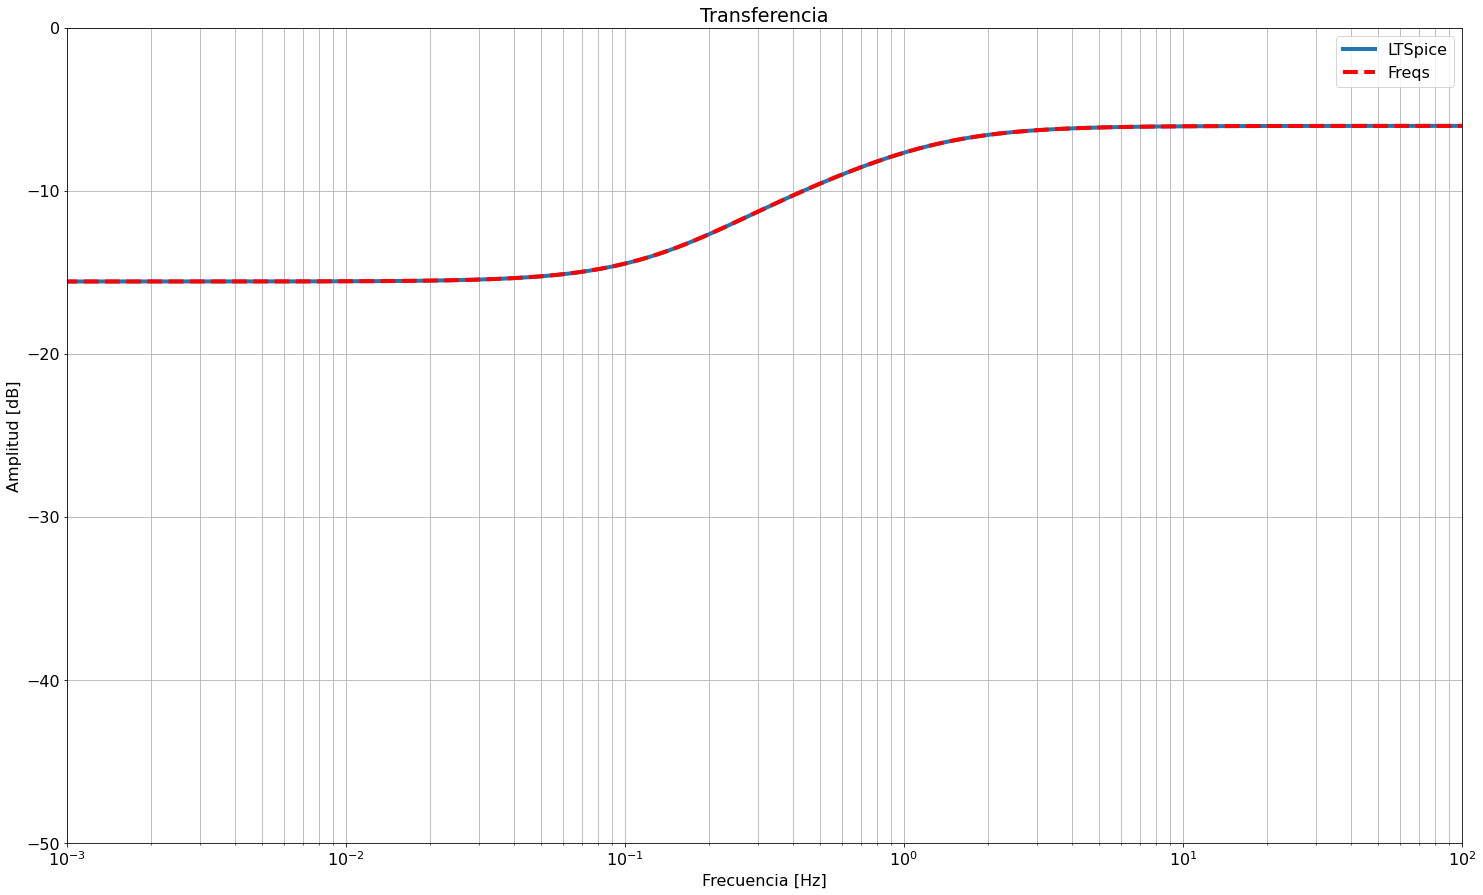

In [15]:
# Importo simulaciones de LTSpice
l = ltspice.Ltspice('Simulacion/EJ1.raw')
l.parse()

freq = l.get_frequency()
T = l.get_data('I(R4)')

fig, ax = plt.subplots(1,1)

ax.grid(visible='true', which='both', axis='both') 
ax.legend(['LTSpice']) 
ax.set_ylabel('Amplitud [dB]') 
ax.set_xlabel('Frecuencia [Hz]') 
ax.set_xlim([0.001, 100]) 
ax.set_ylim([-50, 0])
    
ax.set_title('Transferencia') 
ax.semilogx(freq, 20 * np.log10(abs(T)), linewidth=4, label='LTSpice Y') 

# Obtengo respuesta con freqs
#K = 0.5
#num_T = np.polymul([K],[1, 1])
#den_T = np.polymul([1, 2],[1, 4])
K = 0.5
num = K * np.array([1, 5, 4])
den = np.array([1, 8, 12])

w = np.logspace(-4, 4, 1000)

_, T_2 = sig.freqs(num, den, w)

ax.semilogx(w / (2*np.pi), 20 * np.log10(abs(T_2)), 'r--', linewidth=4, label='Freqs') 
ax.legend(['LTSpice', 'Freqs']) 

print(abs(T[0]) / abs(T_2[0]))

# Resolución simbólica
s = sp.symbols('s ', complex=True)

Z22_s = ( 6*(s**2 + 8*s + 12) ) / ( s**2 + 5*s + 4 )
Y1 = 1 / Z22_s

# Remocion constante para Z22_s
Z2 = Z22_s - 3
R1 = '3'
print(R1)
Y2 = 1/Z2

# Remocion polo en -4 para Z3
Z3, Zt2, R2, C1 = tc2.remover_polo_sigma(Z2, 4, isImpedance = True)
print(R2,C1)
Y3 = 1/Z3

# Remocion polo en -1 para Z2
Z4, Zt1, R3, C2 = tc2.remover_polo_sigma(Z3, 1, isImpedance = True)
print(R3,C2)
Y4 = 1/Z4

# El resto sera R4
R4 = Z4
print(R4)

# Dibujamos la red resultante:
    
d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V1$', '-'), 
                        current_lbl = '$I1$')

d = tc2.dibujar_elemento_derivacion(d, Resistor, R4)
d = tc2.dibujar_tanque_RC_serie(d, R2, C1)
d = tc2.dibujar_tanque_RC_serie(d, R3, C2)
d = tc2.dibujar_elemento_serie(d, Resistor, R1)

d = tc2.dibujar_puerto_salida(d,
                        voltage_lbl = ('+', '$V2$', '-'), 
                        current_lbl = '$I2$')

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Z22',  
                                          Z22_s, 
                                          hacia_salida = False,
                                          k_gap_width = 0.5)

display(d)

# Ejercicio 2

## Desarrollo

![Consigna](Consigna2.png "Consigna")

![1](Desarrollo/1.jpeg "1")

![2](Desarrollo/2.jpeg "2")

## Simulacion

0.9999955640614936


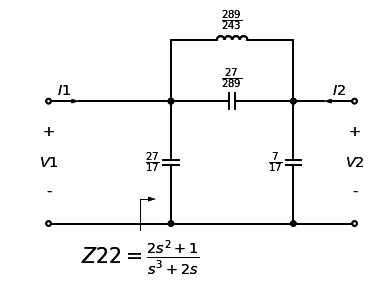

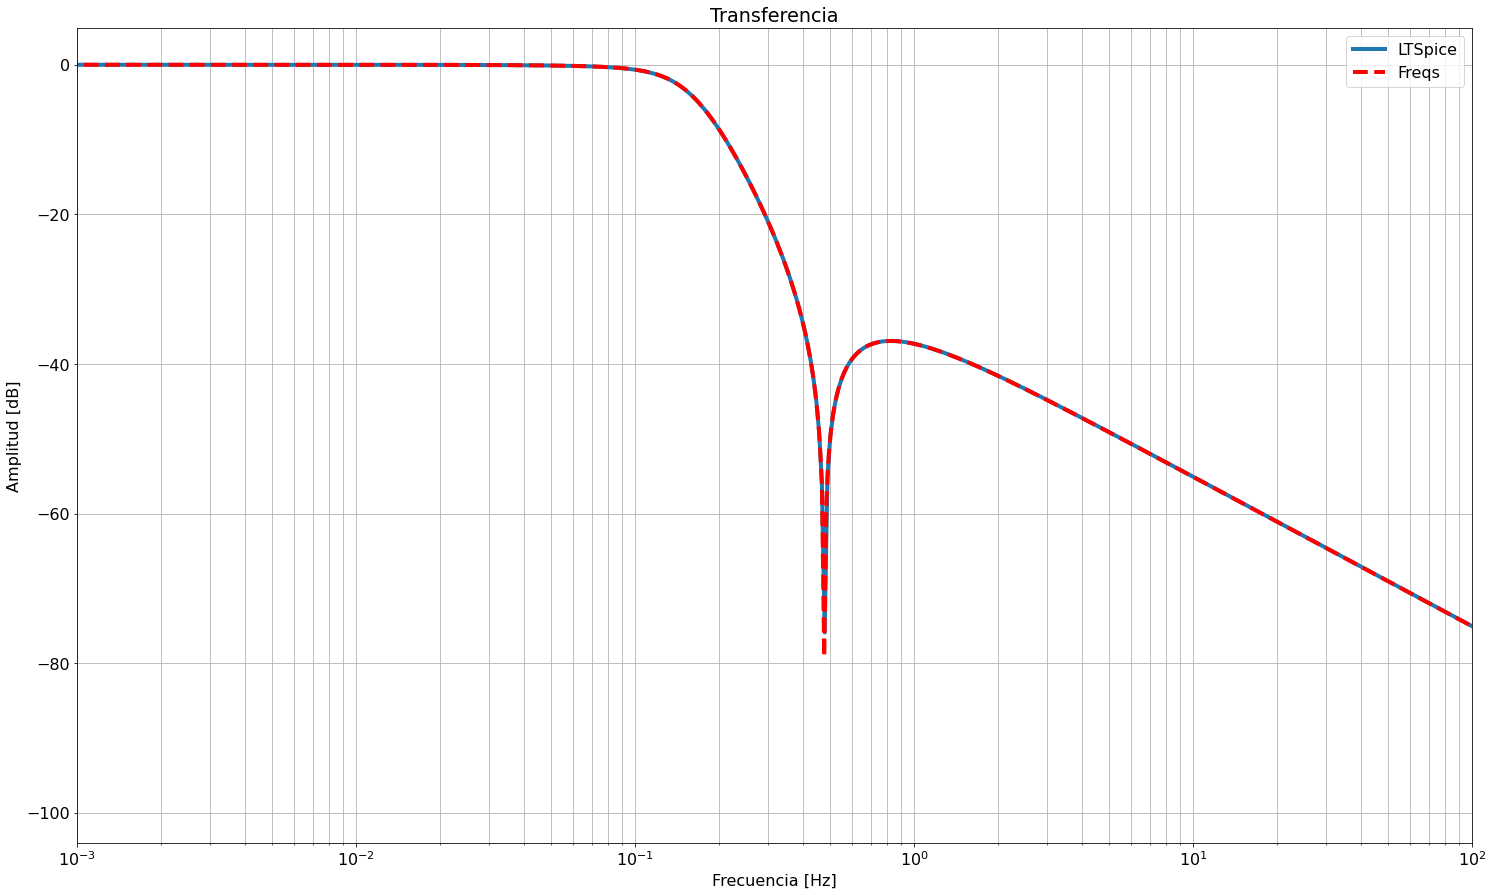

In [33]:
# Importo simulaciones de LTSpice
l = ltspice.Ltspice('Simulacion/EJ2.raw')
l.parse()

freq = l.get_frequency()
T = l.get_data('V(vo)')

fig, ax = plt.subplots(1,1)

ax.grid(visible='true', which='both', axis='both') 
ax.legend(['LTSpice']) 
ax.set_ylabel('Amplitud [dB]') 
ax.set_xlabel('Frecuencia [Hz]') 
ax.set_xlim([0.001, 100]) 
#ax.set_ylim([-50, 0])
    
ax.set_title('Transferencia') 
ax.semilogx(freq, 20 * np.log10(abs(T)), linewidth=4, label='LTSpice') 

# Obtengo respuesta con freqs
#K = 0.5
#num_T = np.polymul([K],[1, 1])
#den_T = np.polymul([1, 2],[1, 4])
K = 1/9
num = K * np.array([1, 0, 9])
den = np.array([1, 2, 2, 1])

w = np.logspace(-4, 4, 1000)

_, T_2 = sig.freqs(num, den, w)

ax.semilogx(w / (2*np.pi), 20 * np.log10(abs(T_2)), 'r--', linewidth=4, label='Freqs') 
ax.legend(['LTSpice', 'Freqs']) 

print(abs(T[0]) / abs(T_2[0]))

# Resolución simbólica
s = sp.symbols('s ', complex=True)

Z22_s = ( (2*s**2+1) ) / ( (s**3+2*s) )
Y1 = 1 / Z22_s

# Remocion en infinito Y22
Y2, Yc1 = tc2.remover_polo_infinito(Y1, omega_zero = 3)
C1 = Yc1/s
Z2 = 1/Y2

# Remocion polo en 3 para Z2
Z3, Zt1, L1, C2 = tc2.remover_polo_jw(Z2, isImpedance = True, omega = 3)

# Remocion constante para Z4
Z4, Zc3 = tc2.remover_polo_dc(Z3)
C3 = 1/(Zc3*s)

# Dibujamos la red resultante:
    
d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V1$', '-'), 
                        current_lbl = '$I1$')

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Z22',  
                                          Z22_s, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = tc2.dibujar_elemento_derivacion(d, Capacitor, C3)
d = tc2.dibujar_tanque_serie(d, L1, C2)
d = tc2.dibujar_elemento_derivacion(d, Capacitor, C1)
#d = tc2.dibujar_espacio_derivacion(d)
#d = tc2.dibujar_elemento_derivacion(d, Capacitor, C1)

d = tc2.dibujar_puerto_salida(d,
                        voltage_lbl = ('+', '$V2$', '-'), 
                        current_lbl = '$I2$')


display(d)